In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

import pyvdirs.dirs as dirs
import sys
sys.path.insert(0, dirs.SYSTEM_HOME)
sys.path.insert(0, os.path.join(dirs.SYSTEM_HOME, "ToyExample"))

from ToyExample.toy_example import extract_results_from_log, plot_loss

%load_ext autoreload
%autoreload 2

## Parameters

In [11]:
log_path = os.path.join(dirs.MODELS_HOME, "ToyExample", "11_SoftMaxTrick", "log_InvertedGuideACIDInterpolatedLoss.txt")
log_path_2 = os.path.join(dirs.MODELS_HOME, "ToyExample", "10_EarlyStopACID", "log_NoACIDGuided.txt")
# log_path = os.path.join(dirs.MODELS_HOME, "ToyExample", "log_test.txt")

## Extract loss

In [12]:
results = extract_results_from_log(log_path)

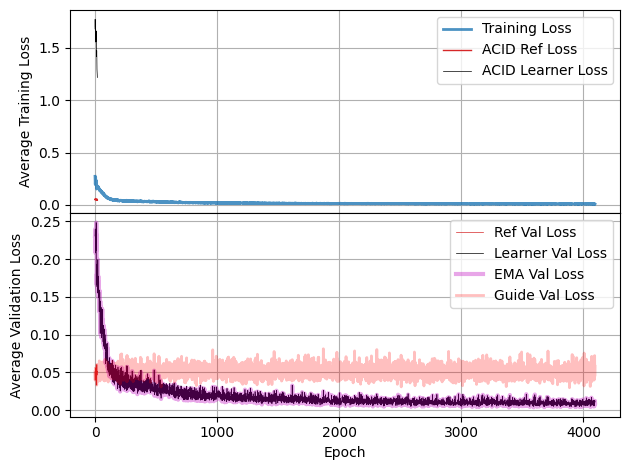

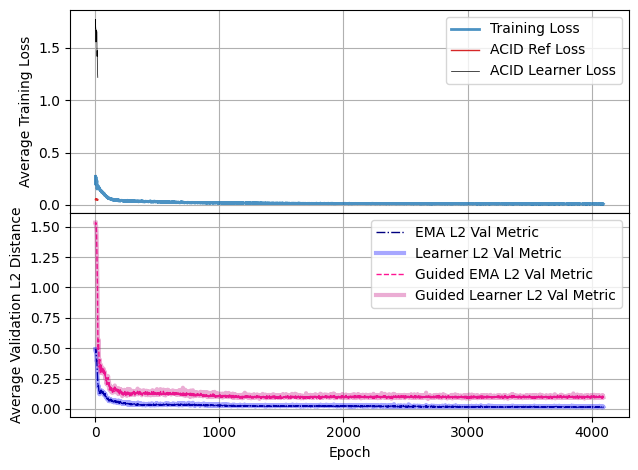

In [13]:
fig_path = log_path.replace(".txt",".png").replace("log", "plot")

fig_1, fig_2 = plot_loss(results, fig_path=fig_path)

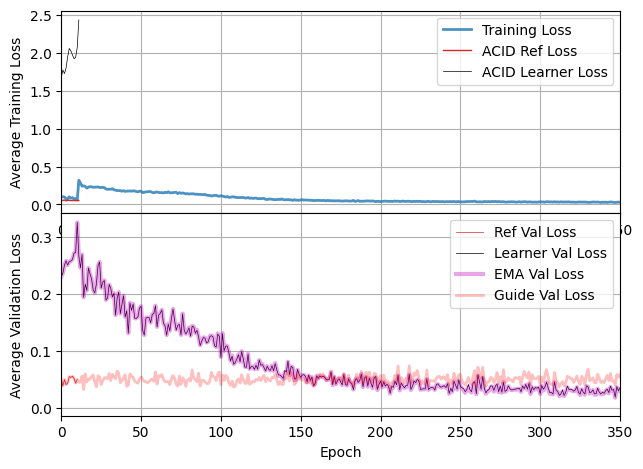

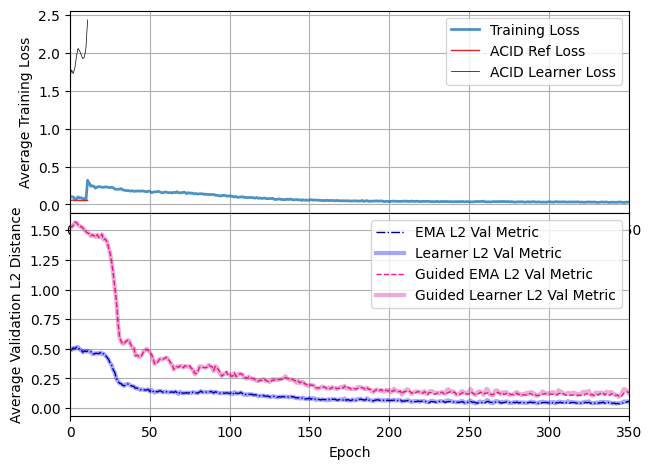

In [5]:
fig_path = log_path.replace(".txt",".png").replace("log", "plot")

fig_1, fig_2 = plot_loss(results, fig_path=fig_path)

fig_path = fig_path.replace("plot", "zoom")

fig_path_base, fig_extension = os.path.splitext(fig_path)
axes = fig_1.axes
for ax in axes:
    ax.set_xlim([0,350])
fig_1.savefig(fig_path_base+"_1"+fig_extension)

fig_path_base, fig_extension = os.path.splitext(fig_path)
axes = fig_2.axes
for ax in axes:
    ax.set_xlim([0,350])
fig_2.savefig(fig_path_base+"_2"+fig_extension)

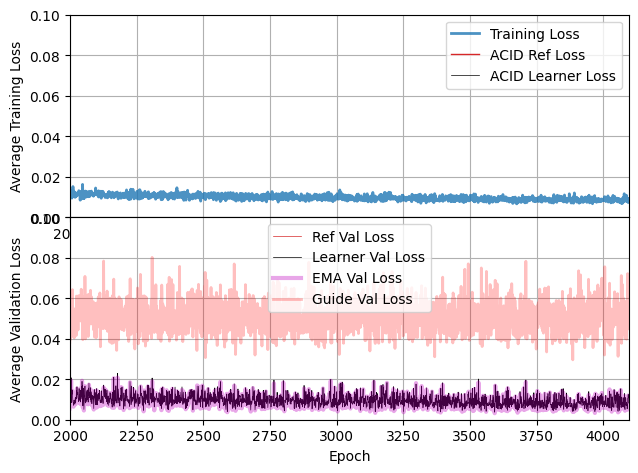

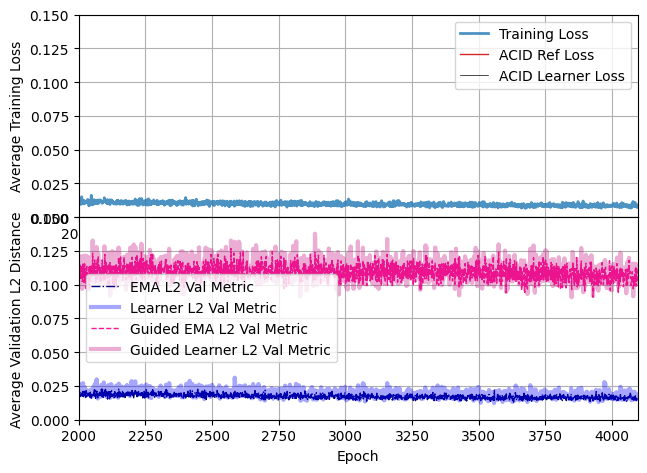

In [10]:
fig_1, fig_2 = plot_loss(results, fig_path=fig_path)

axes = fig_1.axes
for ax in axes:
    ax.set_xlim([2000,4096])
    ax.set_ylim([0, 0.10])

axes = fig_2.axes
for ax in axes:
    ax.set_xlim([2000,4096])
    ax.set_ylim([0, 0.15])

In [ ]:
results_2 = extract_results_from_log(log_path_2)

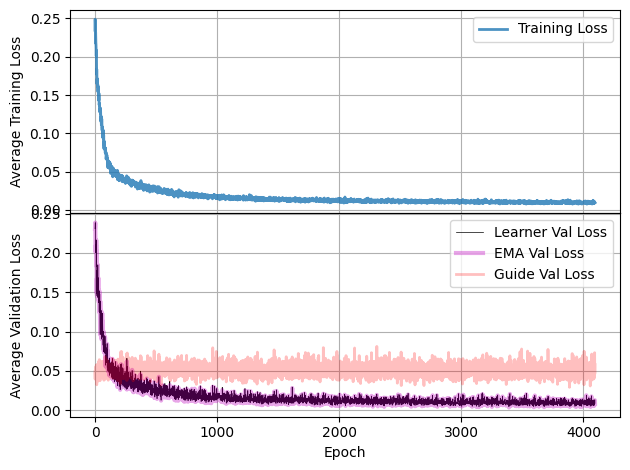

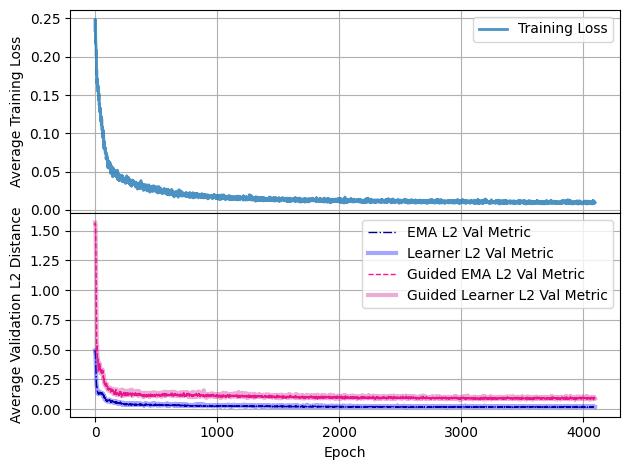

In [29]:
fig_path = log_path_2.replace(".txt",".png").replace("log", "plot")

fig_1, fig_2 = plot_loss(results_2, fig_path=fig_path)

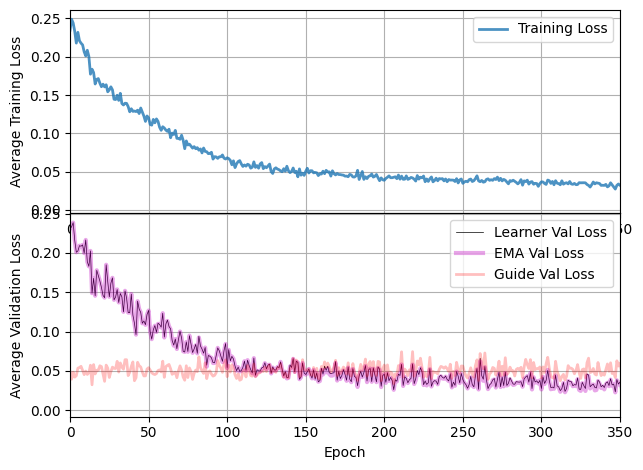

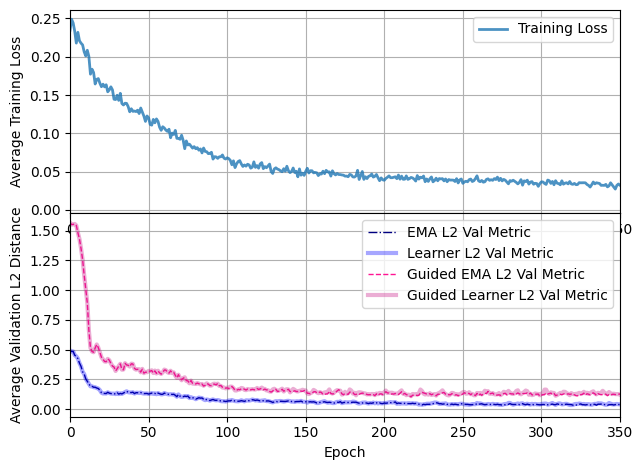

In [30]:
fig_path = log_path_2.replace(".txt",".png").replace("log", "plot")

fig_1, fig_2 = plot_loss(results_2, fig_path=fig_path)

fig_path = fig_path.replace("plot", "zoom")

fig_path_base, fig_extension = os.path.splitext(fig_path)
axes = fig_1.axes
for ax in axes:
    ax.set_xlim([0,350])
plt.savefig(fig_path_base+"_1"+fig_extension)

fig_path_base, fig_extension = os.path.splitext(fig_path)
axes = fig_2.axes
for ax in axes:
    ax.set_xlim([0,350])
plt.savefig(fig_path_base+"_2"+fig_extension)

In [9]:
results

{'learner_loss': [0.23463860154151917,
  0.23544389009475708,
  0.24107375741004944,
  0.2387295961380005,
  0.242132306098938,
  0.24008098244667053,
  0.2377815842628479,
  0.23544694483280182,
  0.23374249041080475,
  0.2420743852853775,
  0.24527466297149658,
  0.24530959129333496,
  0.26191794872283936,
  0.2671048045158386,
  0.25890010595321655,
  0.2504315674304962,
  0.25378453731536865,
  0.24543535709381104,
  0.23546430468559265,
  0.23668858408927917,
  0.2426752746105194,
  0.24701982736587524,
  0.24580007791519165,
  0.24668562412261963,
  0.2517775893211365,
  0.24308806657791138,
  0.25257062911987305,
  0.25276127457618713,
  0.2431507408618927],
 'ref_loss': [0.05065885931253433,
  0.052169911563396454,
  0.05546040087938309,
  0.04977141320705414,
  0.048012979328632355,
  0.05087589472532272,
  0.05432087555527687,
  0.051841434091329575,
  0.05095032602548599,
  0.04966713488101959,
  0.054843127727508545,
  0.050325457006692886,
  0.05011831223964691,
  0.054225

## Compare

### Automatically

In [ ]:
def compare_loss(log_path, plotting=True):
    
    if "No_ACID" in log_path:
        acid_first = False
        log_path_2 = log_path.replace("No_ACID", "ACID")
        labels = ["No ACID", "ACID"]
    else:
        acid_first = True
        log_path_2 = log_path.replace("ACID", "No_ACID")
        labels = ["ACID", "No ACID"]
    
    results = extract_results_from_log(log_path, plotting=False)
    results_2 = extract_results_from_log(log_path_2, plotting=False)

    train_loss_colors = ["C0", "mediumblue"]
    ref_loss_colors = ["C3", "lightcoral"]
    val_loss_colors = ["k", "grey"]
    val_linestyle = [":", "-"]
    linewidth = [2, 0.5]
    zorder = [100, 0]
    if not acid_first: 
        train_loss_colors = train_loss_colors[::-1]
        val_loss_colors = val_loss_colors[::-1]
        val_linestyle = val_linestyle[::-1]
        linewidth = linewidth[::-1]
        zorder = zorder[::-1]

    if plotting:
        plt.figure()
        plt.plot(results["ref_loss"], color=ref_loss_colors[0], label=labels[0]+" Ref Training", alpha=0.8, zorder=zorder[0], linewidth=linewidth[0])
        plt.plot(results_2["ref_loss"], color=ref_loss_colors[1], label=labels[1]+" Ref Training", alpha=0.8, zorder=zorder[1], linewidth=linewidth[1])
        plt.plot(results["mini_learner_loss"], color=train_loss_colors[0], label=labels[0]+" Training", alpha=0.8, linewidth=linewidth[0])
        plt.plot(results_2["mini_learner_loss"], color=train_loss_colors[1], label=labels[1]+" Training", alpha=0.8, linewidth=linewidth[1])
        if len(results["ref_val_loss"])>0: 
            plt.plot(results["learner_val_loss"], color=val_loss_colors[0], linestyle=val_linestyle[0], label=labels[0]+" Validation", alpha=1, linewidth=1, zorder=zorder[0])
            plt.plot(results["learner_val_loss"], color=val_loss_colors[1], linestyle=val_linestyle[1], label=labels[1]+" Validation", alpha=1, linewidth=1, zorder=zorder[1])
        plt.xlabel("Epoch")
        plt.ylabel("Average Loss")
        plt.grid()
        plt.legend()
        plt.tight_layout()

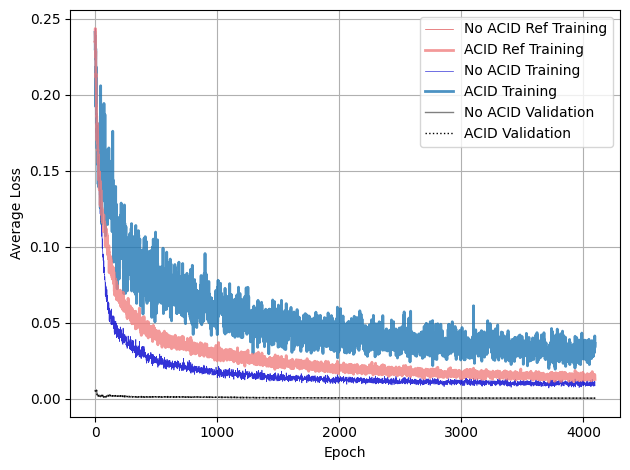

In [ ]:
compare_loss(log_path)

### Manually

In [8]:
results = extract_results_from_log(log_path)
results_2 = extract_results_from_log(log_path_2)

In [9]:
super_learner_loss = results["super_learner_loss"]
super_ref_loss = results["super_ref_loss"]
learner_loss = results["learner_loss"]
learner_val_loss = results["learner_val_loss"]
ema_val_loss = results["ema_val_loss"]
guide_val_loss = results["guide_val_loss"]
ref_val_loss = results["ref_val_loss"]
ema_L2_val_metric = results["ema_L2_val_metric"]
ema_guided_L2_val_metric = results["ema_guided_L2_val_metric"]
L2_val_metric = results["L2_val_metric"]
guided_L2_val_metric = results["guided_L2_val_metric"]

super_learner_loss_2 = results_2["super_learner_loss"]
super_ref_loss_2 = results_2["super_ref_loss"]
learner_loss_2 = results_2["learner_loss"]
learner_val_loss_2 = results_2["learner_val_loss"]
ema_val_loss_2 = results_2["ema_val_loss"]
guide_val_loss_2 = results_2["guide_val_loss"]
ref_val_loss_2 = results_2["ref_val_loss"]
ema_L2_val_metric_2 = results_2["ema_L2_val_metric"]
ema_guided_L2_val_metric_2 = results_2["ema_guided_L2_val_metric"]
L2_val_metric_2 = results_2["L2_val_metric"]
guided_L2_val_metric_2 = results_2["guided_L2_val_metric"]

In [10]:
fig_path = log_path.replace(".txt",".png").replace("log","compared")
zoom_fig_path = fig_path.replace("compared","zoom_compared")

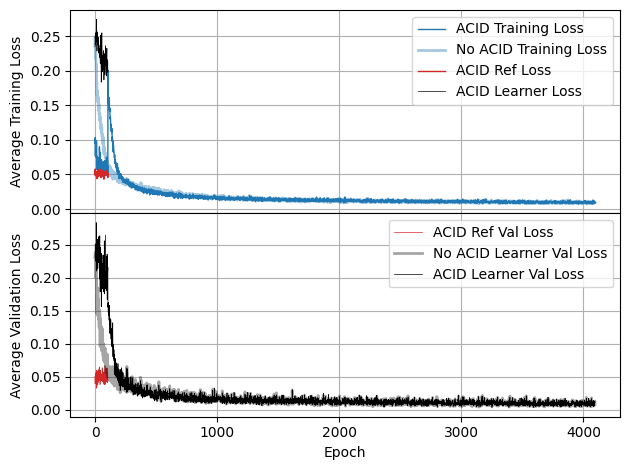

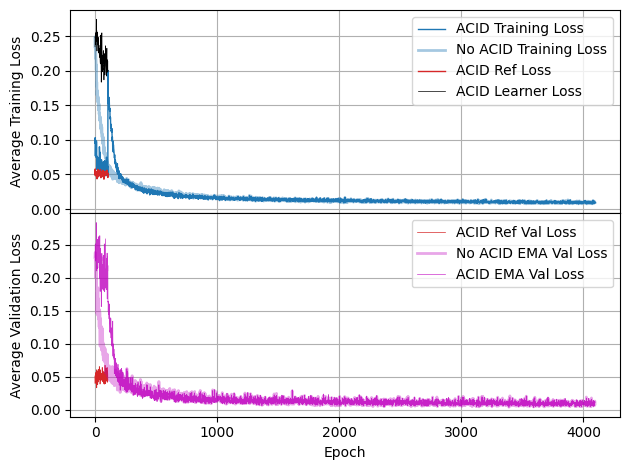

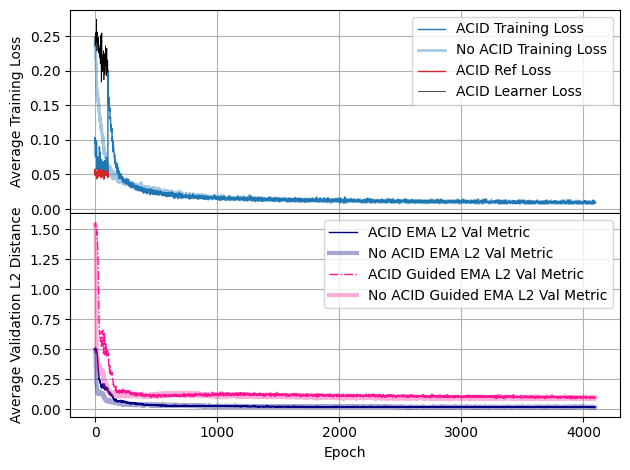

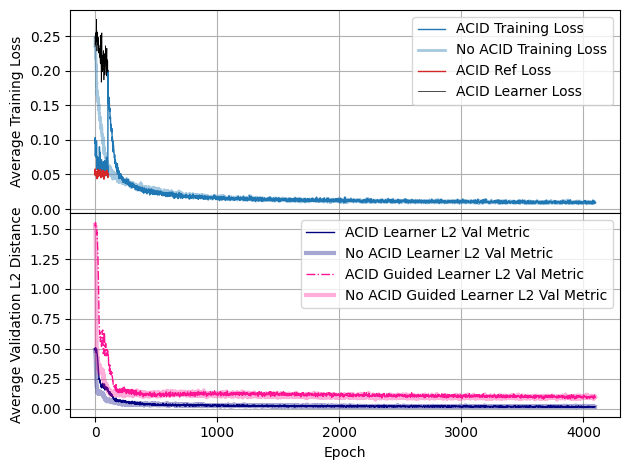

In [12]:
zoom_in = False
max_iter = 350

# Basic plot
def plot_training_loss():
    fig, axes = plt.subplots(nrows=2, gridspec_kw=dict(hspace=0))
    axes[0].plot(results["learner_loss"], "C0", label="ACID Training Loss", alpha=1, linewidth=1)
    axes[0].plot(results_2["learner_loss"], "C0", label="No ACID Training Loss", alpha=0.4, linewidth=2)
    if len(results["super_ref_loss"])>0: 
        axes[0].plot(results["super_ref_loss"], "C3", label="ACID Ref Loss", alpha=1, linewidth=1)
        axes[0].plot(results["super_learner_loss"], "k", label="ACID Learner Loss", alpha=1, linewidth=0.5)
    axes[1].set_xlabel("Epoch")
    axes[0].set_ylabel("Average Training Loss")
    axes[0].legend()
    for ax in axes: ax.grid()
    return fig, axes

# First, plot validation loss values
fig_0, axes_0 = plot_training_loss()
if len(learner_val_loss)>0:
    if len(ref_val_loss)>0:
        axes_0[1].plot(ref_val_loss, "C3", label="ACID Ref Val Loss", alpha=1, linewidth=0.5)
    axes_0[1].plot(learner_val_loss_2, "k", label="No ACID Learner Val Loss", alpha=0.35, linewidth=2)
    axes_0[1].plot(learner_val_loss, "k", label="ACID Learner Val Loss", alpha=1.0, linewidth=0.5)
axes_0[1].set_ylabel("Average Validation Loss")
axes_0[1].legend()
plt.tight_layout()
if zoom_in:
    for ax in axes_0: ax.set_xlim([0,max_iter])

# Also plot EMA validation loss values
fig_1, axes_1 = plot_training_loss()
if len(learner_val_loss)>0:
    if len(ref_val_loss)>0:
        axes_1[1].plot(ref_val_loss, "C3", label="ACID Ref Val Loss", alpha=1, linewidth=0.5)
    axes_1[1].plot(ema_val_loss_2, color="m", label="No ACID EMA Val Loss", alpha=0.35, linewidth=2)
    axes_1[1].plot(ema_val_loss, color="m", label="ACID EMA Val Loss", alpha=0.8, linewidth=0.5)
axes_1[1].set_ylabel("Average Validation Loss")
axes_1[1].legend()
plt.tight_layout()
if zoom_in:
    for ax in axes_1: ax.set_xlim([0,max_iter])
    
# Then, plot EMA validation loss values
fig_2, axes_2 = plot_training_loss()
if len(learner_val_loss)>0:
    axes_2[1].plot(results["ema_L2_val_metric"], "-", color="navy", 
                  label="ACID EMA L2 Val Metric", alpha=1, linewidth=1)
    axes_2[1].plot(results_2["ema_L2_val_metric"], "-", color="navy", 
                    label="No ACID EMA L2 Val Metric", alpha=0.35, linewidth=3)
    if len(results["ema_guided_L2_val_metric"])>0:
        axes_2[1].plot(results["ema_guided_L2_val_metric"], "-.", color="deeppink", 
                     label="ACID Guided EMA L2 Val Metric", alpha=1, linewidth=1)
        axes_2[1].plot(results_2["ema_guided_L2_val_metric"], "-", color="deeppink", 
                     label="No ACID Guided EMA L2 Val Metric", alpha=0.35, linewidth=3)
        axes_2[1].set_ylabel("Average Validation L2 Distance")
axes_2[1].legend()
plt.tight_layout()
if zoom_in:
    for ax in axes_2: ax.set_xlim([0,max_iter])

# Also plot EMA validation loss values
fig_3, axes_3 = plot_training_loss()
if len(learner_val_loss)>0:
    axes_3[1].plot(results["L2_val_metric"], "-", color="navy", 
                  label="ACID Learner L2 Val Metric", alpha=1, linewidth=1)
    axes_3[1].plot(results_2["L2_val_metric"], "-", color="navy", 
                    label="No ACID Learner L2 Val Metric", alpha=0.35, linewidth=3)
    if len(results["guided_L2_val_metric"])>0:
        axes_3[1].plot(results["guided_L2_val_metric"], "-.", color="deeppink", 
                     label="ACID Guided Learner L2 Val Metric", alpha=1, linewidth=1)
        axes_3[1].plot(results_2["guided_L2_val_metric"], "-", color="deeppink", 
                     label="No ACID Guided Learner L2 Val Metric", alpha=0.35, linewidth=3)
        axes_3[1].set_ylabel("Average Validation L2 Distance")
axes_3[1].legend()
plt.tight_layout()
if zoom_in:
    for ax in axes_3: ax.set_xlim([0,max_iter])

In [95]:
fig_path = os.path.join(dirs.MODELS_HOME, "ToyExample", "08_GuideAsACIDRef", 
                        "compared_inverted_guide_acid_and_deactivate.png")
plt.savefig(fig_path)

<Figure size 640x480 with 0 Axes>